### Requirments

In [12]:
!pip install pandas numpy matplotlib seaborn plotly tensorflow scikit-learn Pillow 


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python -m pip install --upgrade pip


### Imports

In [13]:
import numpy as np
import os ,PIL
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import LeakyReLU




### Configs

In [22]:
# Set the path to your dataset directory
dataset_dir = "crop_images"

# Set the path to the directory where you want to save the train and test data
train_dir = "Data/Train"
test_dir = "Data/Test"

valid_dir = test_dir
CLASS_LABELS  =  os.listdir(dataset_dir)
NUM_CLASSES = len(CLASS_LABELS)

EARLY_STOPPING_CRITERIA=3 
SEED = 12

IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_SIZE = 256

LR = 0.001
BATCH_SIZE = 10



### Train test split


In [15]:

# Set the test size (e.g., 20% of the data will be used for testing)
test_size = 0.2
train_size = 0.8
# Get the list of subdirectories (class labels) in the dataset directory
class_labels = os.listdir(dataset_dir)

# Create the train and test directories#optional
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split the dataset into train and test sets for each cass
for label in class_labels:
    label_dir = os.path.join(dataset_dir, label)
    train_label_dir = os.path.join(train_dir, label)
    test_label_dir = os.path.join(test_dir, label)
    os.makedirs(train_label_dir, exist_ok=True)
    os.makedirs(test_label_dir, exist_ok=True)

    # Get the list of image files in the current class directory
    images = os.listdir(label_dir)

    # Split the image files into train and test sets
    train_images, test_images = train_test_split(images, test_size=test_size,train_size=train_size)

    # Copy the train images to the train directory
    for train_image in train_images:
        src = os.path.join(label_dir, train_image)
        dst = os.path.join(train_label_dir, train_image)
        shutil.copy(src, dst)

    # Copy the test images to the test directory
    for test_image in test_images:
        src = os.path.join(label_dir, test_image)
        dst = os.path.join(test_label_dir, test_image)
        shutil.copy(src, dst)

### 3. Defining Model

In [16]:
num_classes = len(CLASS_LABELS)

# Load the pre-trained MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Create a Sequential model
model = Sequential()

# Add the pre-trained MobileNet base to the Sequential model
model.add(base_model)
model.add(GlobalAveragePooling2D())

# Add multiple hidden layers
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))  # First hidden layer with LeakyReLU
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))  # Third hidden layer with LeakyReLU
model.add(Dense(16, activation='relu'))
model.add(Dense(8))
model.add(LeakyReLU(alpha=0.1))  # Fourth hidden layer with LeakyReLU
model.add(Dense(4, activation='relu'))
model.add(Dense(2))
model.add(LeakyReLU(alpha=0.1))  # Fifth hidden layer with LeakyReLU 

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))  # Assuming num_classes is defined

# Make the last 20 layers of the base model trainable
for layer in base_model.layers[-20:]:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

# Print the model summary
model.summary()


/tmp/ipykernel_31882/3217478646.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 1,344,320 (5.13 MB)

 Non-trainable params: 1,884,544 (7.19 MB)

### Model training

In [23]:
# Prepare the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation split
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20  # Adjust the number of epochs as needed
)
# Save the model
model.save('krishimitra.h5')



Found 288 images belonging to 5 classes.
Found 53 images belonging to 5 classes.
Epoch 1/20


/home/chaya/Documents/GitHub/crop-classification/cnn/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2444 - loss: 1.6318 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 1.6062
Epoch 2/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 1:04 2s/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4000 - loss: 1.6062

2024-06-27 03:05:49.363466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-27 03:05:49.849658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4000 - loss: 1.6062 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.6229
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2768 - loss: 1.5976 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.2200 - val_loss: 1.5882
Epoch 4/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 1:03 2s/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4000 - loss: 1.5621

2024-06-27 03:07:12.567675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-27 03:07:12.763279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4000 - loss: 1.5621 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.4710
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 75s 3s/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4368 - loss: 1.5342 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3000 - val_loss: 1.5550
Epoch 6/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 1:08 3s/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5000 - loss: 1.4292

2024-06-27 03:08:30.453799: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.5000 - loss: 1.4292 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.6330
Epoch 7/20


2024-06-27 03:08:30.727894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.4301 - loss: 1.4778 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.4200 - val_loss: 1.5062
Epoch 8/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 1:15 3s/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.6000 - loss: 1.4094

2024-06-27 03:09:46.258671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.6000 - loss: 1.4094 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 1.3460
Epoch 9/20


2024-06-27 03:09:46.554665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - Precision: 0.9655 - Recall: 0.0401 - accuracy: 0.4451 - loss: 1.4103 - val_Precision: 1.0000 - val_Recall: 0.0800 - val_accuracy: 0.4600 - val_loss: 1.4657
Epoch 10/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 1:15 3s/step - Precision: 1.0000 - Recall: 0.1000 - accuracy: 0.5000 - loss: 1.2741

2024-06-27 03:11:05.419143: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - Precision: 1.0000 - Recall: 0.1000 - accuracy: 0.5000 - loss: 1.2741 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.4899
Epoch 11/20


2024-06-27 03:11:05.640525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - Precision: 0.9668 - Recall: 0.1499 - accuracy: 0.4011 - loss: 1.3346 - val_Precision: 1.0000 - val_Recall: 0.1200 - val_accuracy: 0.4000 - val_loss: 1.4237
Epoch 12/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 1:00 2s/step - Precision: 1.0000 - Recall: 0.3000 - accuracy: 0.5000 - loss: 1.2454

2024-06-27 03:12:16.649623: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - Precision: 1.0000 - Recall: 0.3000 - accuracy: 0.5000 - loss: 1.2454 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.4785
Epoch 13/20


2024-06-27 03:12:16.854962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - Precision: 0.9639 - Recall: 0.1934 - accuracy: 0.4959 - loss: 1.2453 - val_Precision: 1.0000 - val_Recall: 0.0800 - val_accuracy: 0.4200 - val_loss: 1.3854
Epoch 14/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 1:01 2s/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2000 - loss: 1.5653

2024-06-27 03:13:22.927727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-27 03:13:23.104295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.2000 - loss: 1.5653 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.3627
Epoch 15/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - Precision: 0.8395 - Recall: 0.2008 - accuracy: 0.4707 - loss: 1.2734 - val_Precision: 0.8125 - val_Recall: 0.2600 - val_accuracy: 0.4200 - val_loss: 1.3050
Epoch 16/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - Precision: 1.0000 - Recall: 0.2000 - accuracy: 0.3000 - loss: 1.7729 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.5039
Epoch 17/20


2024-06-27 03:14:34.439451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-27 03:14:34.590964: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - Precision: 0.8534 - Recall: 0.3339 - accuracy: 0.4775 - loss: 1.1576 - val_Precision: 0.9375 - val_Recall: 0.3000 - val_accuracy: 0.4400 - val_loss: 1.3690
Epoch 18/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - Precision: 1.0000 - Recall: 0.2000 - accuracy: 0.5000 - loss: 1.2941 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.5439
Epoch 19/20


2024-06-27 03:15:55.003592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-27 03:15:55.173208: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - Precision: 0.8938 - Recall: 0.3648 - accuracy: 0.5798 - loss: 1.0656 - val_Precision: 0.7895 - val_Recall: 0.3000 - val_accuracy: 0.4800 - val_loss: 1.2904
Epoch 20/20
 1/28 ━━━━━━━━━━━━━━━━━━━━ 1:01 2s/step - Precision: 0.6667 - Recall: 0.2000 - accuracy: 0.4000 - loss: 1.2808

2024-06-27 03:17:05.059752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - Precision: 0.6667 - Recall: 0.2000 - accuracy: 0.4000 - loss: 1.2808 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.8862


2024-06-27 03:17:05.431428: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Found 53 images belonging to 5 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 661ms/step - Precision: 0.9044 - Recall: 0.3890 - accuracy: 0.6241 - loss: 1.1059
Validation accuracy: 0.4717
Validation precision: 0.8235
Validation recall: 0.2642
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 864ms/step


/home/chaya/Documents/GitHub/crop-classification/cnn/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/chaya/Documents/GitHub/crop-classification/cnn/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/chaya/Documents/GitHub/crop-classification/cnn/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

              precision    recall  f1-score   support

        jute       0.41      1.00      0.59        12
       maize       0.64      0.64      0.64        11
        rice       0.46      0.50      0.48        12
   sugarcane       0.00      0.00      0.00        11
       wheat       0.00      0.00      0.00         7

    accuracy                           0.47        53
   macro avg       0.30      0.43      0.34        53
weighted avg       0.33      0.47      0.37        53



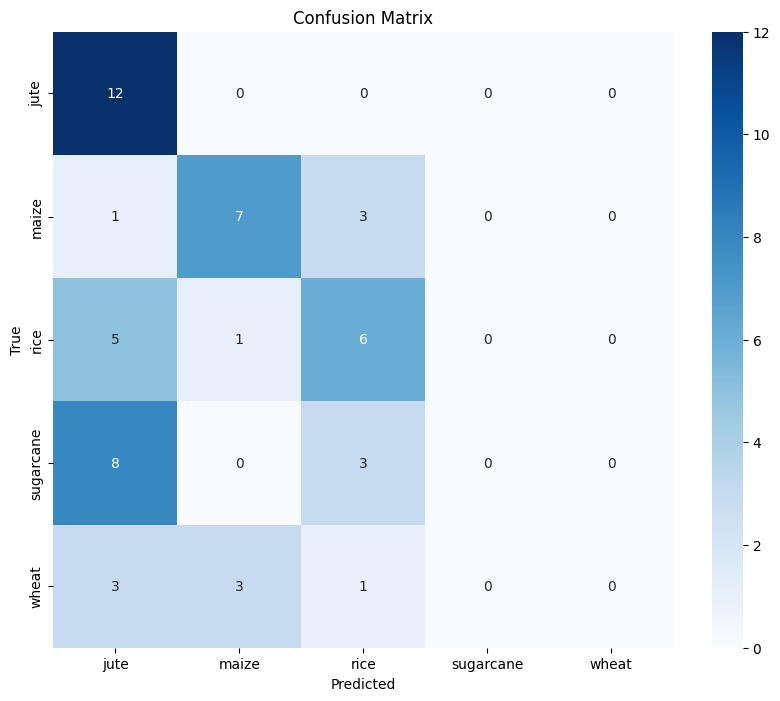

In [24]:
# Prepare the data generators for validation set
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

validation_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=16,  # Same batch size used during training
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Important for evaluation to ensure the order of predictions matches the order of labels
)

# Evaluate the model on the validation set
loss, accuracy, precision, recall = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy:.4f}')
print(f'Validation precision: {precision:.4f}')
print(f'Validation recall: {recall:.4f}')

# Get predictions
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Print classification report
class_labels = list(validation_generator.class_indices.keys())
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
